Becky's EDA for Fraud Case Study

#### Initial EDA

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [145]:
df = pd.read_json('~/data.json')

In [146]:
# Creating a fraud target for classification based on string in acct_type (per assignment)
df['fraud'] = df.acct_type.str.contains('fraud')

In [147]:
# Imbalanced classes... 91 / 9 
df.fraud.value_counts(normalize=True)

False    0.909814
True     0.090186
Name: fraud, dtype: float64

In [148]:
# Replace NaNs with Unknown for country so we can still use the rest of the data

df.country.replace({np.nan: 'Unknown', '': 'Unknown'}, inplace=True)

In [149]:
df.country.value_counts()[:5]

US         9234
GB         2083
CA         1262
AU          742
Unknown     397
Name: country, dtype: int64

### Don't forget to Establish a baseline

In [150]:
import re as re
import string

In [151]:
# Try adding in engineered features on the language

In [198]:
model_df = df.copy()

In [199]:
def remove_html_tags(string):
    result = re.sub('(<[^>]+>|/\r?\n|\r/g&amp\xa0)','',string)
    result = re.sub('\n', '', result)
    result = re.sub('\r', '', result)
    return result


In [200]:
model_df['desc_no_html']=model_df['description'].apply(lambda cw : remove_html_tags(cw))

In [201]:
# maybe fraudulent events have more punctuation or caps in their name or description?? 

def punctuation_ratio(str): 
    punc = 0
    for ch in str: 
        if ch in string.punctuation: 
            punc += 1
    if len(str) == 0: 
        return 0
    else: 
        return punc / len(str)
    
def caps_ratio(str): 
    caps = 0
    for ch in str: 
        if ch.isupper(): 
            caps += 1
    if len(str) == 0: 
        return 0
    else: 
        return caps / len(str)

In [202]:
model_df['name_punc_ratio'] = model_df['name'].apply(punctuation_ratio)
model_df['desc_no_html']=model_df['description'].apply(lambda cw : remove_html_tags(cw))
model_df['desc_punc_ratio'] = model_df['desc_no_html'].apply(punctuation_ratio)
model_df['name_caps_ratio'] = model_df['name'].apply(caps_ratio)
model_df['desc_caps_ratio'] = model_df['desc_no_html'].apply(caps_ratio)
model_df['org_name_caps_ratio'] = model_df['org_name'].apply(caps_ratio)
model_df['org_name_punc_ratio'] = model_df['org_name'].apply(punctuation_ratio)
model_df['org_desc_caps_ratio'] = model_df['org_desc'].apply(caps_ratio)
model_df['org_desc_punc_ratio'] = model_df['org_desc'].apply(punctuation_ratio)

In [203]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   acct_type            14337 non-null  object 
 1   approx_payout_date   14337 non-null  int64  
 2   body_length          14337 non-null  int64  
 3   channels             14337 non-null  int64  
 4   country              14337 non-null  object 
 5   currency             14337 non-null  object 
 6   delivery_method      14321 non-null  float64
 7   description          14337 non-null  object 
 8   email_domain         14337 non-null  object 
 9   event_created        14337 non-null  int64  
 10  event_end            14337 non-null  int64  
 11  event_published      14238 non-null  float64
 12  event_start          14337 non-null  int64  
 13  fb_published         14337 non-null  int64  
 14  gts                  14337 non-null  float64
 15  has_analytics        14337 non-null 

In [204]:
# Dropping columns with lots of NaNs or text only 

model_df.drop(columns=['acct_type', 'description', 'name', 'desc_no_html',
                 'org_desc', 'previous_payouts', 
                 'ticket_types', 'venue_country', 
                 'venue_longitude', 'venue_latitude', 
                 'venue_name', 'venue_state', 'venue_address', 'has_header'], inplace=True)


In [205]:
# label encoding first to make it easy... 
le = LabelEncoder()

In [206]:
# Testing out the label encoder on one column 

model_df['country'] = le.fit_transform(model_df['country'])

In [207]:
model_df.country

0        65
1        65
2        65
3        30
4        65
         ..
14332    65
14333    65
14334    67
14335    65
14336    24
Name: country, Length: 14337, dtype: int64

In [208]:
# Label encoding for other categorical columns 
model_df['currency'] = le.fit_transform(model_df['currency'])
model_df['email_domain'] = le.fit_transform(model_df['email_domain'])
model_df['listed'] = le.fit_transform(model_df['listed'])
model_df['payee_name'] = le.fit_transform(model_df['payee_name'])
model_df['payout_type'] = le.fit_transform(model_df['payout_type'])
model_df['org_name'] = le.fit_transform(model_df['org_name'])


In [209]:
model_df.dropna(inplace=True)

In [275]:
model_df.shape

(14132, 39)

In [211]:
df.fraud.value_counts()

False    13044
True      1293
Name: fraud, dtype: int64

In [212]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14132 entries, 0 to 14336
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   approx_payout_date   14132 non-null  int64  
 1   body_length          14132 non-null  int64  
 2   channels             14132 non-null  int64  
 3   country              14132 non-null  int64  
 4   currency             14132 non-null  int64  
 5   delivery_method      14132 non-null  float64
 6   email_domain         14132 non-null  int64  
 7   event_created        14132 non-null  int64  
 8   event_end            14132 non-null  int64  
 9   event_published      14132 non-null  float64
 10  event_start          14132 non-null  int64  
 11  fb_published         14132 non-null  int64  
 12  gts                  14132 non-null  float64
 13  has_analytics        14132 non-null  int64  
 14  has_logo             14132 non-null  int64  
 15  listed               14132 non-null 

In [213]:
# Retain new-df as a checkpoint to return to -- new_df is checkpoint, make a copy if messing with ... 

new_df = model_df.copy()

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
y = model_df.pop('fraud')

In [216]:
X = model_df.copy()

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [276]:
y_train.value_counts(normalize=True)

False    0.919898
True     0.080102
Name: fraud, dtype: float64

In [277]:
y_test.value_counts(normalize=True)

False    0.919898
True     0.080102
Name: fraud, dtype: float64

In [220]:
feature_list = list(model_df.columns)


In [221]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (10599, 39)
Training Labels Shape: (10599,)
Testing Features Shape: (3533, 39)
Testing Labels Shape: (3533,)


In [222]:
y_test.sum()


283

In [223]:
len(y_test) - y_test.sum()

3250

In [224]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


In [225]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [226]:
rf_classifier = rf.fit(X_train, y_train)

In [227]:
preds = rf_classifier.predict(X_test)

In [228]:
from sklearn import metrics

In [229]:
print("Accuracy:",metrics.accuracy_score(y_test, preds))
print("Precision:",metrics.precision_score(y_test, preds))
print("Recall:",metrics.recall_score(y_test, preds))
print("F1:",metrics.f1_score(y_test, preds))


Accuracy: 0.9765072176620436
Precision: 0.9385964912280702
Recall: 0.7561837455830389
F1: 0.8375733855185911


Text(0.76, 0.06, 'Recall')

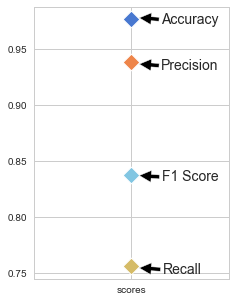

In [230]:
sns.set_style('whitegrid')
scores = ['scores']
fig, ax = plt.subplots(figsize=(3.5, 5))
sns.scatterplot(x=scores, y=metrics.accuracy_score(y_test, preds), marker='D', color='#4878d0', s=140, ax=ax)
sns.scatterplot(x=scores, y=metrics.precision_score(y_test, preds), marker='D', color='#ee854a', s=140, ax=ax)
sns.scatterplot(x=scores, y=metrics.recall_score(y_test, preds), marker='D', color='#d5bb67', s=140, ax=ax)
sns.scatterplot(x=scores, y=metrics.f1_score(y_test, preds), marker='D', color='#82c6e2', s=140, ax=ax)
ax.annotate('Accuracy',
            xy=(.54, 0.96),
            xytext=(0.8, 0.98),
            xycoords=('axes fraction'),
            fontsize=14,
            arrowprops=dict(facecolor='black'), 
           horizontalalignment='center', verticalalignment='top')
ax.annotate('Precision',
            xy=(.54, 0.79),
            xytext=(0.8, 0.81),
            xycoords='axes fraction',
            fontsize=14,
            arrowprops=dict(facecolor='black'), 
           horizontalalignment='center', verticalalignment='top')
ax.annotate('F1 Score',
            xy=(.54, 0.38),
            xytext=(0.8, 0.40),
            xycoords='axes fraction',
            fontsize=14,
            arrowprops=dict(facecolor='black'), 
           horizontalalignment='center', verticalalignment='top')
ax.annotate('Recall', xy=(.54, 0.04),
            xytext=(0.76, 0.06),
            xycoords='axes fraction',
            fontsize=14,
            arrowprops=dict(facecolor='black'), 
           horizontalalignment='center', verticalalignment='top')

In [231]:
pred_prob = rf.predict_proba(X_test)

In [232]:
# Just keep probabilities for positive class (fraud)
y_hat_fraud = pred_prob[:, 1]

In [233]:
y_hat_fraud

array([0.  , 0.  , 0.  , ..., 0.9 , 0.05, 0.01])

In [234]:
from sklearn.metrics import roc_curve

In [235]:
fpr, tpr, thresh = roc_curve(y_test, y_hat_fraud)

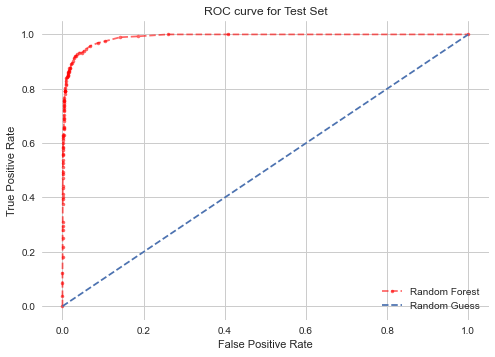

In [236]:
plt.style.use('seaborn')
sns.set_style('whitegrid')

plt.plot(fpr, tpr, linestyle='--',color='red', marker='.', alpha=0.6, label='Random Forest')
plt.plot([0,1], [0,1], linestyle='--', label='Random Guess')

plt.title('ROC curve for Test Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

In [237]:
gmeans = np.sqrt(tpr * (1-fpr))

In [238]:
ix = np.argmax(gmeans)

In [239]:
print('Best Threshold = %f, G-mean=%.3f' % (thresh[ix], gmeans[ix]))

Best Threshold = 0.120000, G-mean=0.946


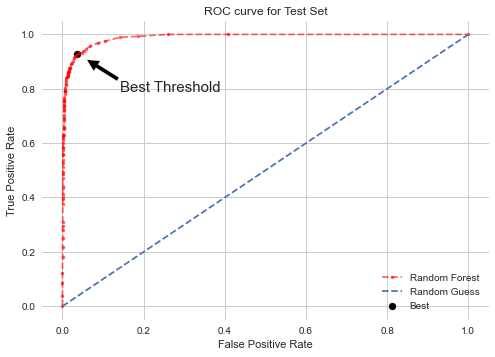

In [244]:
fig, ax = plt.subplots()
plt.style.use('seaborn')
sns.set_style('whitegrid')

plt.plot(fpr, tpr, linestyle='--',color='red', marker='.', alpha=0.6, label='Random Forest')
plt.plot([0,1], [0,1], linestyle='--', label='Random Guess')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

ax.annotate('Best Threshold',
            xy=(0.1, 0.87),
            xytext=(.4, 0.8),
            xycoords='axes fraction',
            fontsize=15,
            arrowprops=dict(facecolor='black'), 
           horizontalalignment='right', verticalalignment='top')
plt.title('ROC curve for Test Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

In [245]:
J = tpr-fpr
ix = np.argmax(J)
best_thresh = thresh[ix]
best_thresh

0.12

In [246]:
from sklearn.metrics import precision_recall_curve

In [247]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)

In [248]:
no_skill = len(y_test[y_test=='True']) / len(y_test)

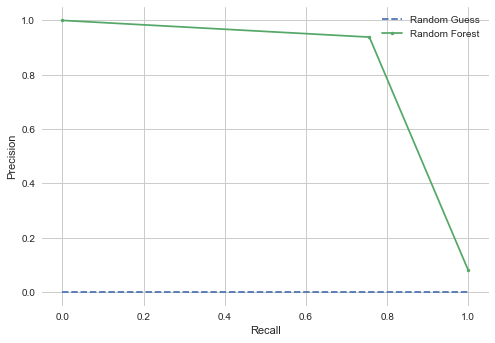

In [249]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Random Guess')
plt.plot(recall, precision, marker = '.', label = 'Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show();

In [250]:
#Use F score to determine a good balance between precision and recall; see how low that makes precision and if we want to bump it for recall 
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold to balance Precision, Recall = %f, F-Score=%.3f' % (thresh[ix], fscore[ix]))

Best Threshold to balance Precision, Recall = 1.000000, F-Score=0.838


In [253]:
threshold = 0.12

pred_prob = rf.predict_proba(X_test)
predicted = (pred_prob [:, 1] >= threshold).astype('int')
accuracy = metrics.accuracy_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
recall = metrics.recall_score(y_test, predicted)
f1 = metrics.f1_score(y_test, predicted)

In [362]:
(0.927*.76*2)/((.972+.76))

0.8135334872979215

In [255]:
accuracy, precision, recall, f1

(0.9609397112935183,
 0.6902887139107612,
 0.9293286219081273,
 0.7921686746987951)

In [256]:
from sklearn.metrics import confusion_matrix

In [257]:
cf_thresh = confusion_matrix(y_test, predicted)
cf_thresh

array([[3132,  118],
       [  20,  263]])

In [258]:
thresholds = np.linspace(0, 1, 100)
thresholds = thresholds.round(2)
accuracy = []
recall = []
precision = []
f1 = []
df = pd.DataFrame(index=thresholds)
for thresh in thresholds: 
    pred_prob = rf.predict_proba(X_test)
    predicted = (pred_prob[:, 1] >= thresh).astype('int')
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    prec = metrics.precision_score(y_test, predicted)
    f1sc = metrics.f1_score(y_test, predicted)
    accuracy.append(acc)
    recall.append(rec)
    precision.append(prec)
    f1.append(f1sc)

df['accuracy'] = accuracy
df['recall'] = recall
df['precision'] = precision
df['f1'] = f1



In [259]:
df

,accuracy,recall,precision,f1
0.00,0.080102,1.000000,0.080102,0.148323
0.01,0.625814,1.000000,0.176324,0.299788
0.02,0.761393,1.000000,0.251332,0.401703
0.03,0.827908,0.992933,0.316798,0.480342
0.04,0.869233,0.989399,0.378890,0.547945
...,...,...,...,...
0.96,0.937164,0.219081,0.984127,0.358382
0.97,0.934050,0.180212,0.980769,0.304478
0.98,0.929805,0.123675,1.000000,0.220126
0.99,0.926691,0.084806,1.000000,0.156352


In [260]:
thresholds_df = df.copy

In [261]:
pal = sns.color_palette('muted')
hexes = pal.as_hex()
print(hexes)
hexes

['#4878d0', '#ee854a', '#6acc64', '#d65f5f', '#956cb4', '#8c613c', '#dc7ec0', '#797979', '#d5bb67', '#82c6e2']


['#4878d0',
 '#ee854a',
 '#6acc64',
 '#d65f5f',
 '#956cb4',
 '#8c613c',
 '#dc7ec0',
 '#797979',
 '#d5bb67',
 '#82c6e2']

Text(0.5, 0, 'Classification Thresholds')

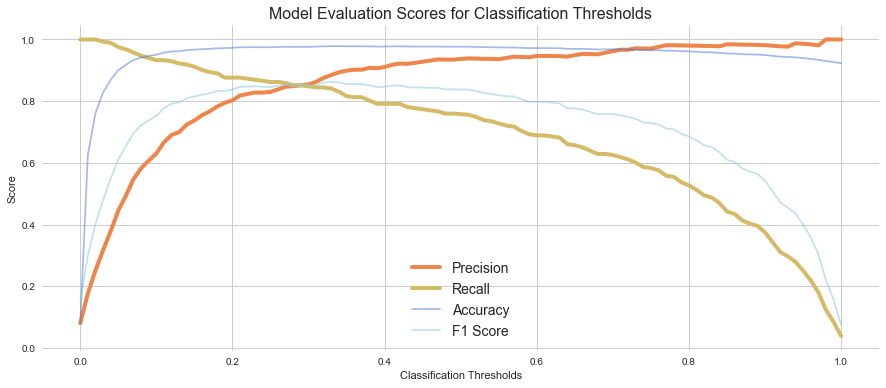

In [262]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.set_style('whitegrid')

sns.lineplot(x=thresholds, y=precision, ax=ax, color='#ee854a', label='Precision', linewidth=4)
sns.lineplot(x=thresholds, y=recall, ax=ax, color='#d5bb67', label='Recall', linewidth=4)
sns.lineplot(x=thresholds, y=accuracy, ax=ax, color='#4878d0', label='Accuracy', alpha=0.5)
sns.lineplot(x=thresholds, y=f1, ax=ax, color='#82c6e2', label='F1 Score', alpha=0.5)
ax.set_title('Model Evaluation Scores for Classification Thresholds', fontsize=16)
ax.legend(fontsize=14)
ax.set_ylabel('Score')
ax.set_xlabel('Classification Thresholds')

In [263]:
intersection_set = set.intersection(set(precision), set(recall))
print(intersection_set)
df.index[df['precision'] == 0.8409893992932862]


{0.8515901060070671, 1.0}


Float64Index([], dtype='float64')

In [264]:
fraud_count = np.sum(y_test)
fraud_count

283

In [267]:
df.loc[0.29]

accuracy     0.976224
recall       0.851590
precision    0.851590
f1           0.851590
Name: 0.29, dtype: float64

In [268]:
# thresh of 0.29 where P / R are 'balanced'


In [292]:
threshold = 0.48

pred_prob = rf.predict_proba(X_test)
predicted = (pred_prob [:, 1] >= threshold).astype('int')
accuracy = metrics.accuracy_score(y_test, predicted)
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
f1 = metrics.f1_score(y_test, predicted)

In [293]:
accuracy, precision, recall, f1

(0.9765072176620436,
 0.9347826086956522,
 0.7597173144876325,
 0.8382066276803118)

In [271]:
confusion = confusion_matrix(y_test, predicted)
confusion

array([[3208,   42],
       [  42,  241]])

(0.75, 1.0)

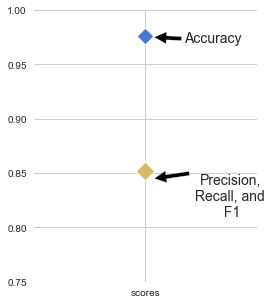

In [274]:
sns.set_style('whitegrid')
scores = ['scores']
fig, ax = plt.subplots(figsize=(4, 5))
sns.scatterplot(x=scores, y=metrics.accuracy_score(y_test, predicted), marker='D', color='#4878d0', s=140, ax=ax)
# sns.scatterplot(x=scores, y=metrics.precision_score(y_test, predicted), marker='D', color='#ee854a', s=210, ax=ax)
sns.scatterplot(x=scores, y=metrics.recall_score(y_test, predicted), marker='D', color='#d5bb67', s=180, ax=ax)
# sns.scatterplot(x=scores, y=metrics.f1_score(y_test, predicted), marker='D', color='#82c6e2', s=140, ax=ax)
ax.annotate('Accuracy',
            xy=(.54, 0.90),
            xytext=(0.8, 0.92),
            xycoords=('axes fraction'),
            fontsize=14,
            arrowprops=dict(facecolor='black'), 
           horizontalalignment='center', verticalalignment='top')
ax.annotate('Precision,\n Recall, and \n F1',
            xy=(.54, 0.38),
            xytext=(0.88, 0.40),
            xycoords='axes fraction',
            fontsize=14,
            arrowprops=dict(facecolor='black'), 
           horizontalalignment='center', verticalalignment='top')
ax.set_ylim(0.75,1)

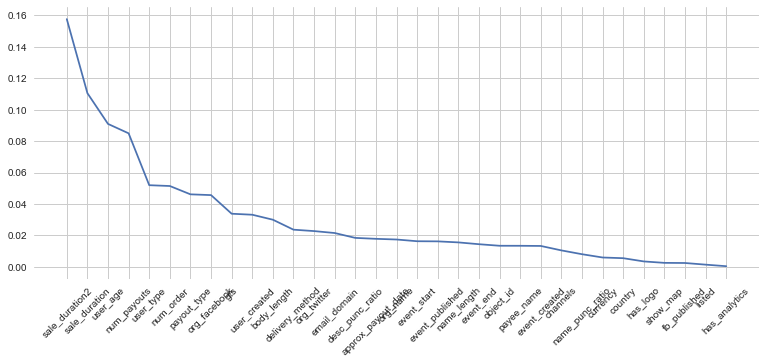

In [133]:
fig, ax = plt.subplots(figsize=(13, 5))
sns.lineplot(data=feature_imp, ax=ax)
ax.tick_params(axis='x', rotation=45)

In [517]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [216]:
param_grid = {'n_estimators': [140, 150, 175], 'criterion': ['gini', 'entropy'], 
             'max_depth': [10, 20, 40], 'max_features': [5, 10, 20]}

In [105]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [106]:
skf = StratifiedKFold()

In [107]:
grid_rf = GridSearchCV(rf, param_grid, cv=skf)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40], 'max_features': [5, 10, 20],
                         'n_estimators': [140, 150, 175]})

In [108]:
grid_rf.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features=10, n_estimators=175,
                       random_state=42)

In [109]:
grid_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 10,
 'n_estimators': 175}

In [278]:
rf_hyp = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features=10, n_estimators=175,
                       random_state=42)

In [279]:
rf_hyp_clf = rf_hyp.fit(X_train, y_train)

In [280]:
preds_rf_hyp = rf_hyp_clf.predict(X_test)

In [281]:
print("Accuracy:",metrics.accuracy_score(y_test, preds_rf_hyp))
print("Precision:",metrics.precision_score(y_test, preds_rf_hyp))
print("Recall:",metrics.recall_score(y_test, preds_rf_hyp))
print("F1:",metrics.f1_score(y_test, preds_rf_hyp))


Accuracy: 0.9762241720917068
Precision: 0.9383259911894273
Recall: 0.7526501766784452
F1: 0.8352941176470589


In [282]:
cf_hyp = confusion_matrix(y_test, preds_rf_hyp)
cf_hyp

array([[3236,   14],
       [  70,  213]])

In [284]:
import joblib

In [285]:
filename = 'tuned_balanced_rf.sav'
joblib.dump(rf_hyp, filename)

['tuned_balanced_rf.sav']

Code for flask for putting predictions into high / med / low risk categories: 

In [287]:
low_thresh = 0.08
high_thresh = 0.48

In [313]:
model = joblib.load('tuned_balanced_rf.sav')

def scores(test_set): 
    pred_prob = model.predict_proba(test_set)
    predicted = (pred_prob[:, 1] >= threshold).astype('int')
    accuracy = metrics.accuracy_score(y_test, predicted)
    recall = metrics.recall_score(y_test, predicted)
    precision = metrics.precision_score(y_test, predicted)
    f1 = metrics.f1_score(y_test, predicted)
    return accuracy, precision, recall, f1

In [319]:
def new_event_prediction(event_array): 
    classification = ''
    event_array = event_array.reshape(1, -1)
    if event_array is not None and event_array is not '': 
        try: 
            pred_prob = model.predict_proba(event_array)
            prob = pred_prob[:, 1]
            if prob >= high_thresh: 
                classification = 'High Risk'
            elif prob >= low_thresh and prob < high_thresh: 
                classification = 'Medium Risk'
            elif prob < low_thresh: 
                classification = 'Low Risk'
        except: 
            pass
    return classification

In [320]:
X_train.iloc[100].values, y_train.loc[100]

(array([1.32150600e+09, 8.21000000e+03, 8.00000000e+00, 2.40000000e+01,
        3.00000000e+00, 0.00000000e+00, 4.64100000e+03, 1.31681388e+09,
        1.32107400e+09, 1.31707597e+09, 1.32106680e+09, 0.00000000e+00,
        1.77600000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        3.20000000e+01, 1.00000000e+00, 1.00000000e+00, 2.11218700e+06,
        3.20000000e+01, 7.41300000e+03, 1.60000000e+01, 0.00000000e+00,
        1.00000000e+00, 4.60000000e+01, 4.90000000e+01, 1.00000000e+00,
        2.30000000e+01, 1.31477851e+09, 1.00000000e+00, 0.00000000e+00,
        1.91522763e-02, 1.25000000e-01, 2.90423862e-02, 1.87500000e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 False)

In [327]:
low_sample = X_train.iloc[100].values

In [357]:
mid_sample = X_train.iloc[16].values

In [345]:
high_sample = X_train.iloc[7].values

In [346]:
high_sample

array([1.30396770e+09, 2.03000000e+02, 5.00000000e+00, 6.50000000e+01,
       6.00000000e+00, 0.00000000e+00, 5.69100000e+03, 1.30095020e+09,
       1.30353570e+09, 1.30095083e+09, 1.30222620e+09, 0.00000000e+00,
       5.47400000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       1.60000000e+01, 1.00000000e+00, 1.00000000e+00, 1.47833300e+06,
       0.00000000e+00, 8.53800000e+03, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 1.40000000e+01, 1.40000000e+01, 0.00000000e+00,
       1.69000000e+02, 1.28641092e+09, 1.00000000e+00, 6.25000000e-02,
       0.00000000e+00, 1.87500000e-01, 0.00000000e+00, 1.39534884e-01,
       2.32558140e-02, 4.00000000e-02, 2.80000000e-01])

In [356]:
X_train.iloc[16]

approx_payout_date     1.314148e+09
body_length            2.610000e+02
channels               8.000000e+00
country                6.500000e+01
currency               6.000000e+00
delivery_method        0.000000e+00
email_domain           5.711000e+03
event_created          1.313649e+09
event_end              1.313716e+09
event_published        1.313649e+09
event_start            1.313708e+09
fb_published           0.000000e+00
gts                    1.813400e+02
has_analytics          0.000000e+00
has_logo               1.000000e+00
listed                 1.000000e+00
name_length            5.000000e+01
num_order              2.000000e+00
num_payouts            0.000000e+00
object_id              2.057301e+06
org_facebook           0.000000e+00
org_name               3.180000e+02
org_twitter            0.000000e+00
payee_name             0.000000e+00
payout_type            1.000000e+00
sale_duration          1.000000e+00
sale_duration2         1.000000e+00
show_map               0.000

In [359]:
new_event_prediction(high_sample)

'High Risk'

In [324]:
model.predict_proba(sample.reshape(1, -1))

array([[0.99428571, 0.00571429]])

In [326]:
len(X_train.columns)

39